In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [ ]:
df = pd.read_excel("data/dataset.xlsx", sheet_name="Sheet1")  # Load Excel file
print(df.head())  # Display first 5 rows
df.drop(columns=["MSSV", "Họ và tên SV"], inplace=True)  # Delete specific column
df.to_csv("data/output.csv", index=False)  # Save as CSV without index
df.to_excel("data/output.xlsx", index=False, sheet_name="Processed")  # Save as Excel

        MSSV    Họ và tên SV   KT1   KT2   KT3  KT_TB    BC  Bonus  QT_x  \
0  202421640   NGUYỄN THU AN  8.11  7.00  6.75   7.29  9.25   0.25  8.52   
1  202413979      ĐÀO LÊ ANH  8.78  4.33  4.50   5.87  8.25   0.75  7.81   
2  202413943     ĐỖ HỒNG ANH  9.33  8.67  7.25   8.42  8.00   0.50  8.71   
3  202413955   DƯƠNG HẢI ANH  9.00  0.00  4.42   4.47  7.75   0.50  6.61   
4  202413967  KHỔNG TÙNG ANH  7.67  0.00  3.84   3.84  5.25   0.00  4.55   

   QT_y   CK  HP_grade  
0   8.5  7.5       7.8  
1   8.0  7.5       7.7  
2   8.5  9.5       9.2  
3   6.5  5.5       5.8  
4   4.5  5.5       5.2  


In [ ]:
df = pd.read_csv("data/output.csv")  # Load CSV file

In [117]:
# Display the number of rows and columns
print(df.shape)
print(df.head())
print(df.info())  # Display data type of each column
print(df.describe())  # Display statistical information of numerical columns
print(df.isnull().sum())  # Check for missing values
print(df.duplicated().sum())  # Check for duplicates
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

(164, 10)
    KT1   KT2   KT3  KT_TB    BC  Bonus  QT_x  QT_y   CK  HP_grade
0  8.11  7.00  6.75   7.29  9.25   0.25  8.52   8.5  7.5       7.8
1  8.78  4.33  4.50   5.87  8.25   0.75  7.81   8.0  7.5       7.7
2  9.33  8.67  7.25   8.42  8.00   0.50  8.71   8.5  9.5       9.2
3  9.00  0.00  4.42   4.47  7.75   0.50  6.61   6.5  5.5       5.8
4  7.67  0.00  3.84   3.84  5.25   0.00  4.55   4.5  5.5       5.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KT1       164 non-null    float64
 1   KT2       162 non-null    float64
 2   KT3       161 non-null    float64
 3   KT_TB     164 non-null    float64
 4   BC        164 non-null    float64
 5   Bonus     164 non-null    float64
 6   QT_x      164 non-null    float64
 7   QT_y      164 non-null    float64
 8   CK        164 non-null    float64
 9   HP_grade  164 non-null    float64
dtypes: float64

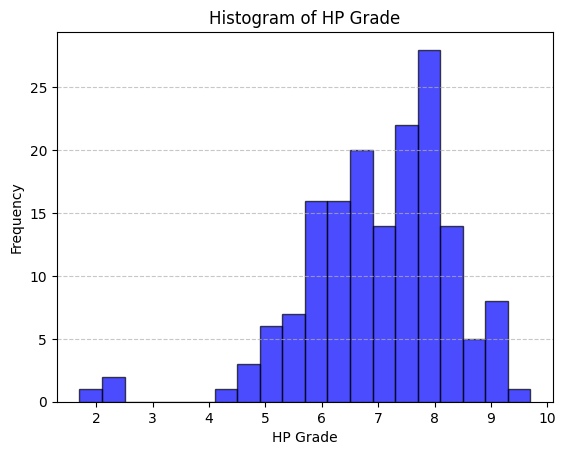

In [118]:
plt.hist(df["HP_grade"], bins=20, color="blue", edgecolor="black", alpha=0.7)
# Formatting
plt.xlabel("HP Grade")
plt.ylabel("Frequency")
plt.title("Histogram of HP Grade")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

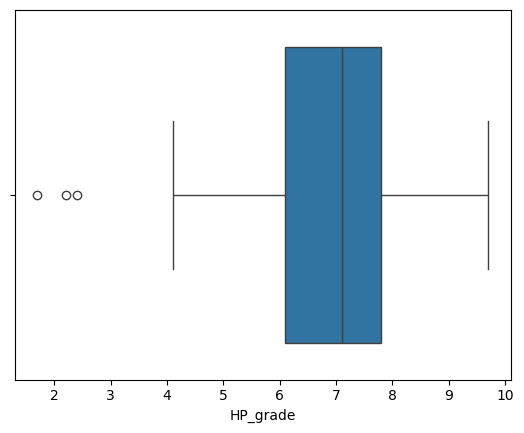

In [119]:
sns.boxplot(x=df["HP_grade"])
plt.show()

In [120]:
df = df[df["HP_grade"] >= 3]

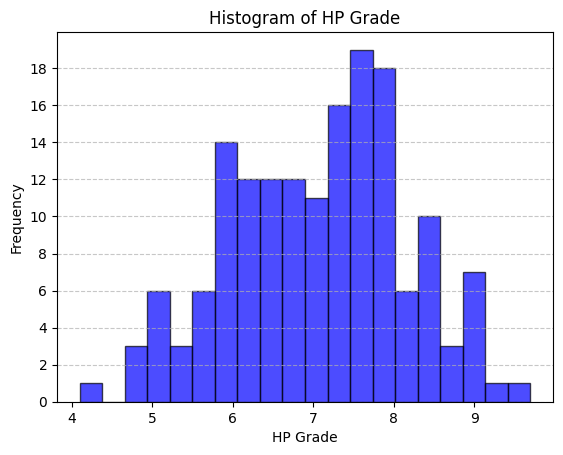

In [121]:
plt.hist(df["HP_grade"], bins=20, color="blue", edgecolor="black", alpha=0.7)
# Formatting
plt.xlabel("HP Grade")
plt.ylabel("Frequency")
plt.title("Histogram of HP Grade")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

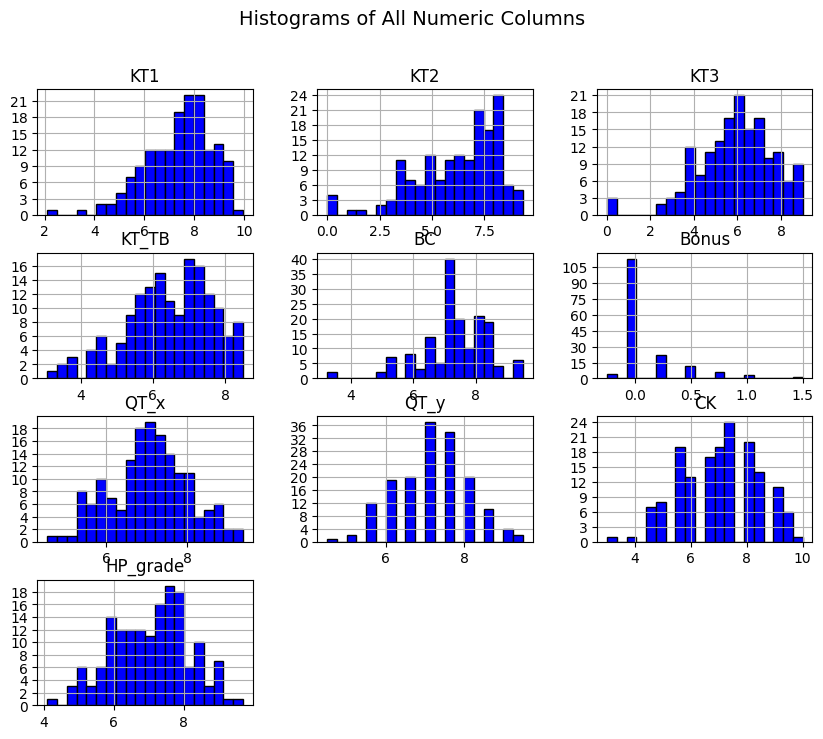

In [122]:
# Create subplots for all numeric columns
df.select_dtypes(include=["number"]).hist(
    bins=20, figsize=(10, 8), color="blue", edgecolor="black"
)
# Ensure y-axis is whole numbers
for ax in plt.gcf().axes:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.suptitle("Histograms of All Numeric Columns", fontsize=14)
plt.show()

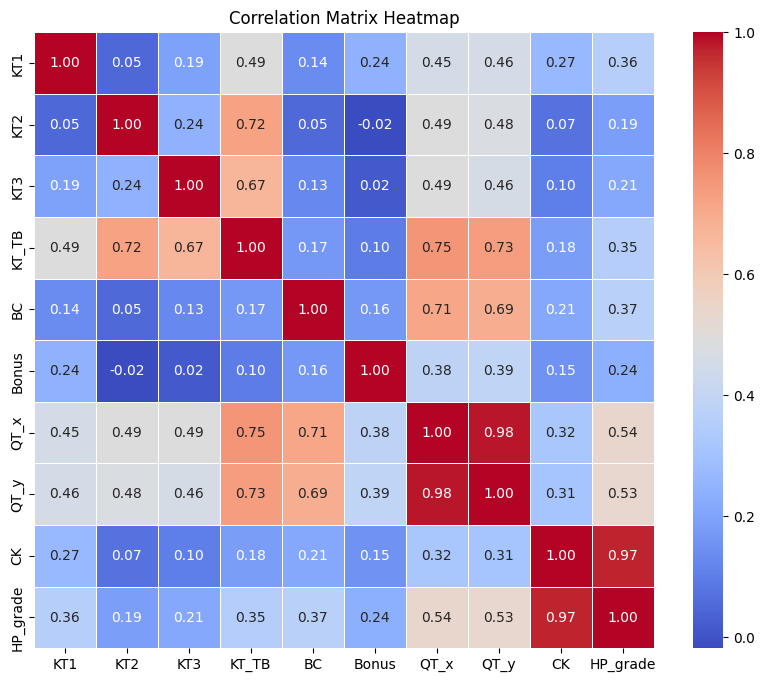

In [123]:
# Create heatmap
corr_matrix = df.corr()
# Set figure size
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

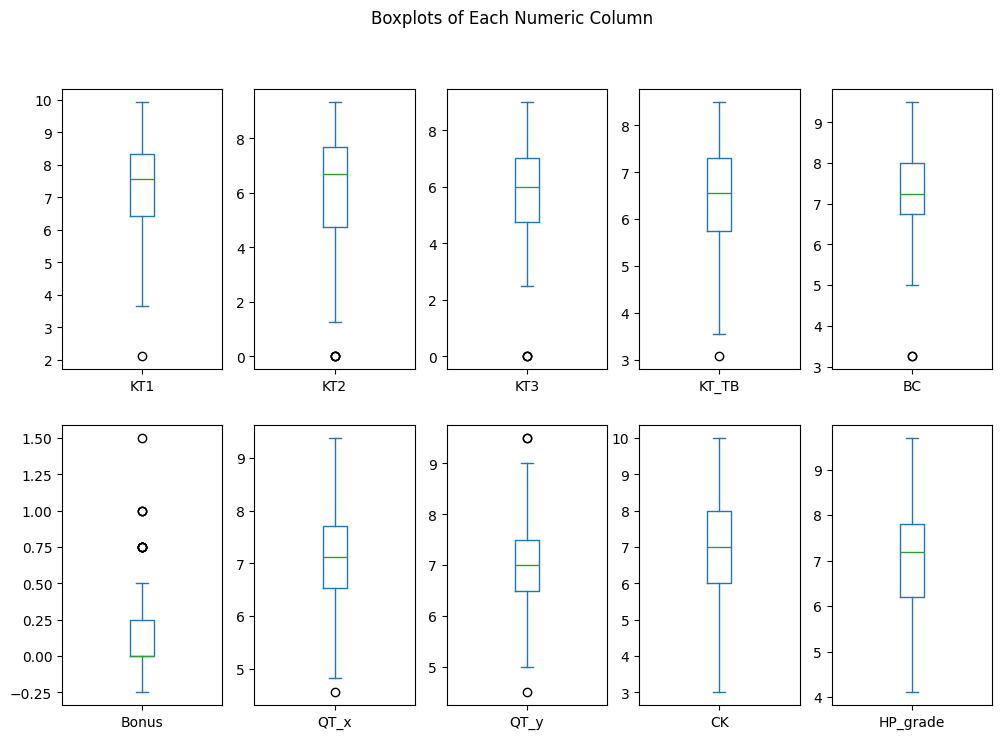

In [124]:
# Loop through numeric columns and create individual boxplots
df.select_dtypes(include=["number"]).plot(
    kind="box",
    subplots=True,
    layout=(2, 5),
    figsize=(12, 8),
    sharex=False,
    sharey=False,
)
plt.suptitle("Boxplots of Each Numeric Column")
plt.show()

In [125]:
df = df[df["QT_x"] >= 3]
df = df[df["KT3"] >= 2]
df = df[df["KT1"] >= 3]
df = df[df["BC"] >= 4]

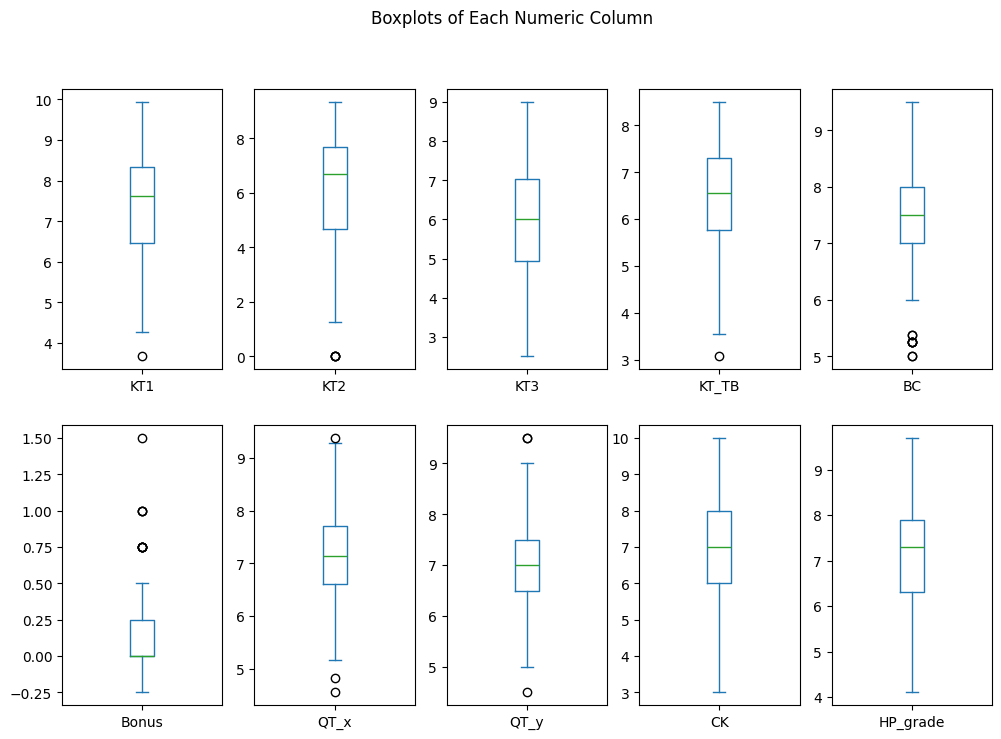

In [126]:
df.select_dtypes(include=["number"]).plot(
    kind="box",
    subplots=True,
    layout=(2, 5),
    figsize=(12, 8),
    sharex=False,
    sharey=False,
)
plt.suptitle("Boxplots of Each Numeric Column")
plt.show()

In [ ]:
df.to_csv("data/processed_data.csv", index=False)  # Save processed data to CSV

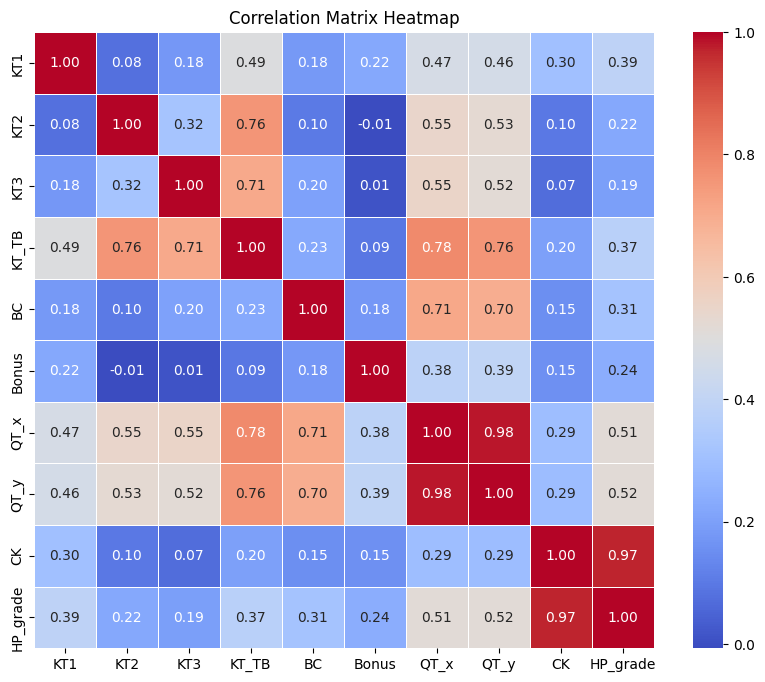

In [128]:
# Create heatmap
corr_matrix = df.corr()
# Set figure size
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()